In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
sns.set(font_scale = 2.5)
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
for col in df_train.columns:
    print(col, 100 * (df_train[col].isnull().sum() / 891))

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.865319865319865
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.10437710437711
Embarked 0.22446689113355783


In [9]:
for col in df_test.columns:
    print(col, 100 * (df_test[col].isnull().sum() / 418))

PassengerId 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 20.574162679425836
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.23923444976076555
Cabin 78.22966507177034
Embarked 0.0


<AxesSubplot:>

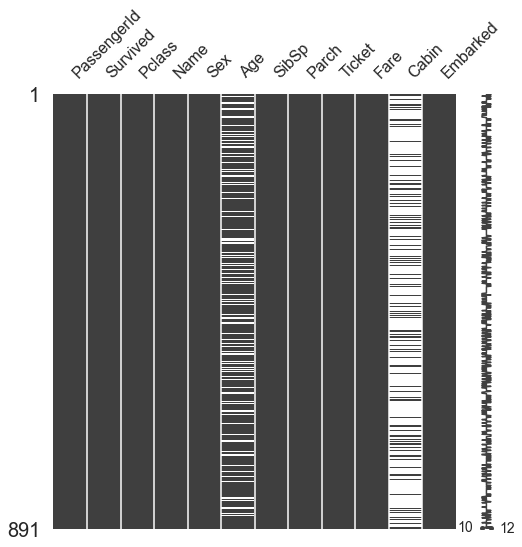

In [12]:
msno.matrix(df=df_train.iloc[:, :], figsize = (8, 8))

<AxesSubplot:>

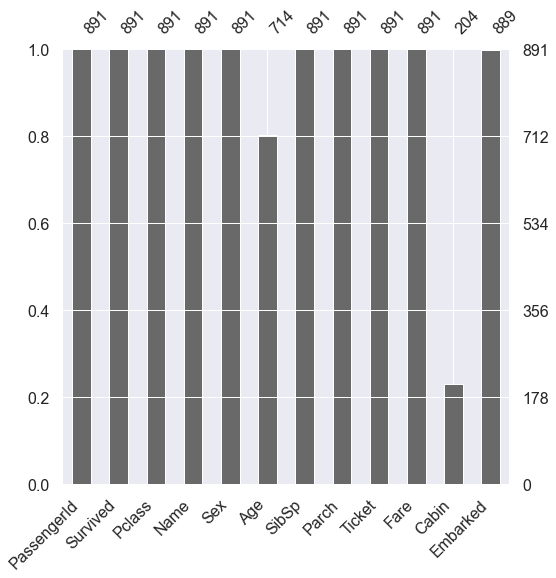

In [13]:
msno.bar(df = df_train.iloc[:, :], figsize=(8, 8))

<AxesSubplot:>

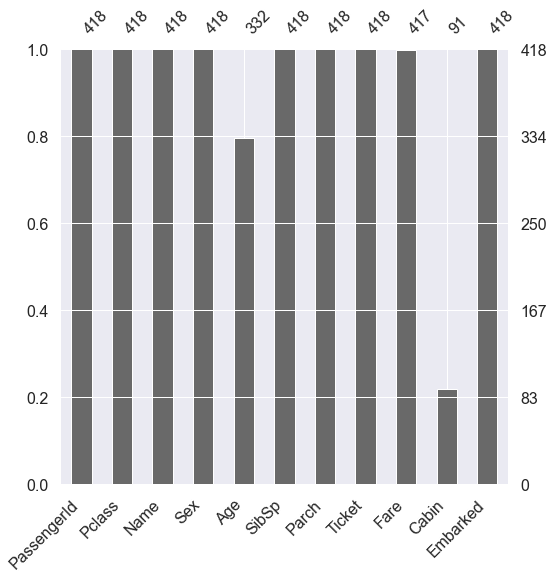

In [14]:
msno.bar(df = df_test.iloc[:, :], figsize=(8, 8))

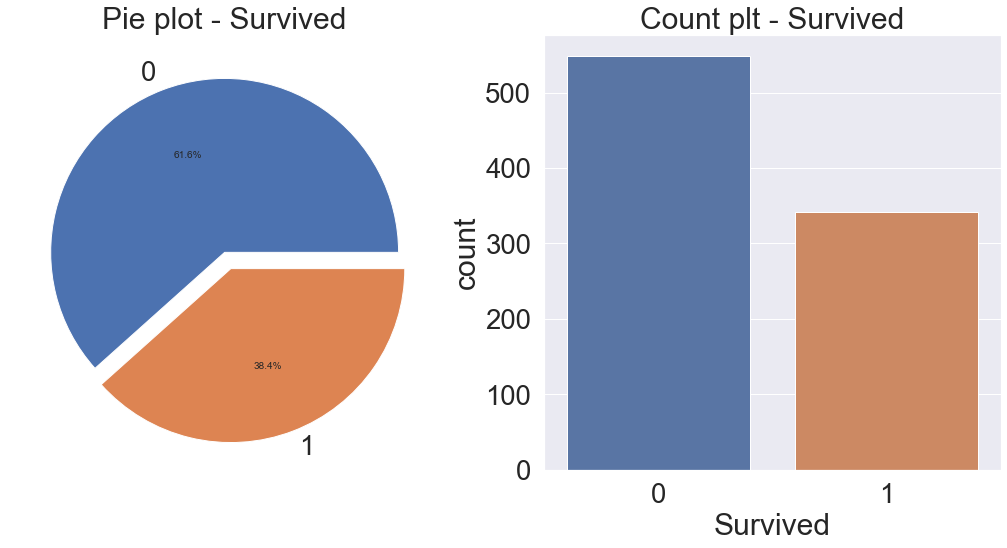

In [21]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plt - Survived')

plt.show()

In [22]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [24]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

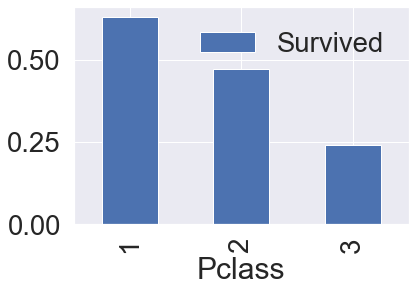

In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(
by = 'Survived', ascending = False).plot.bar()

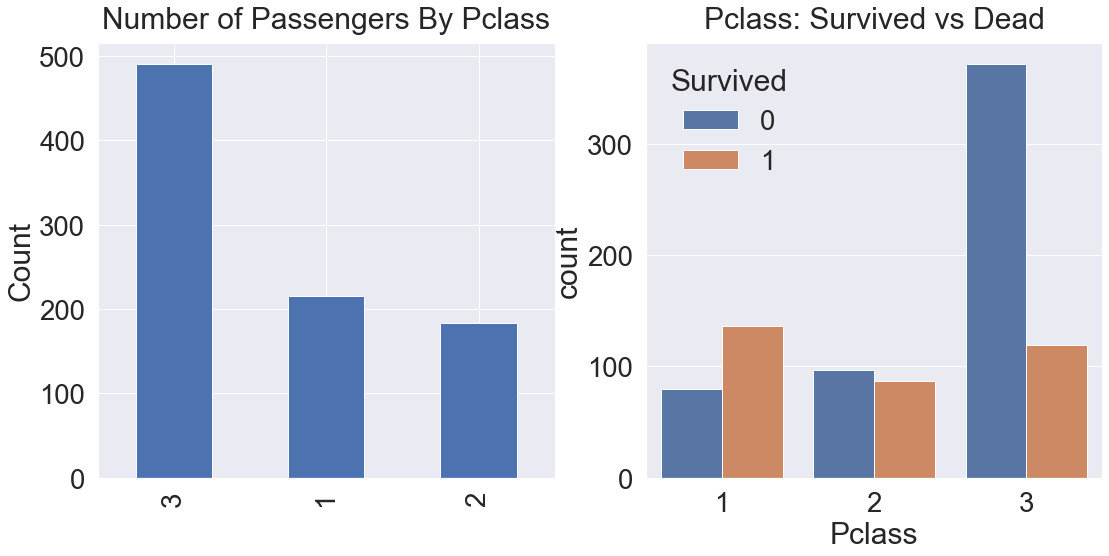

In [26]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

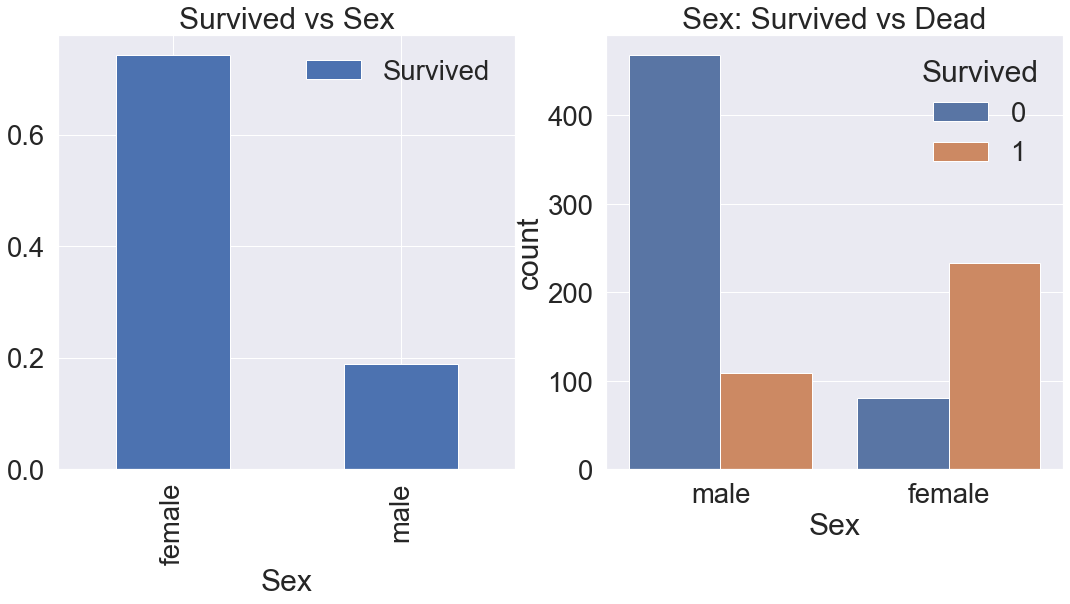

In [27]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [28]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(
by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


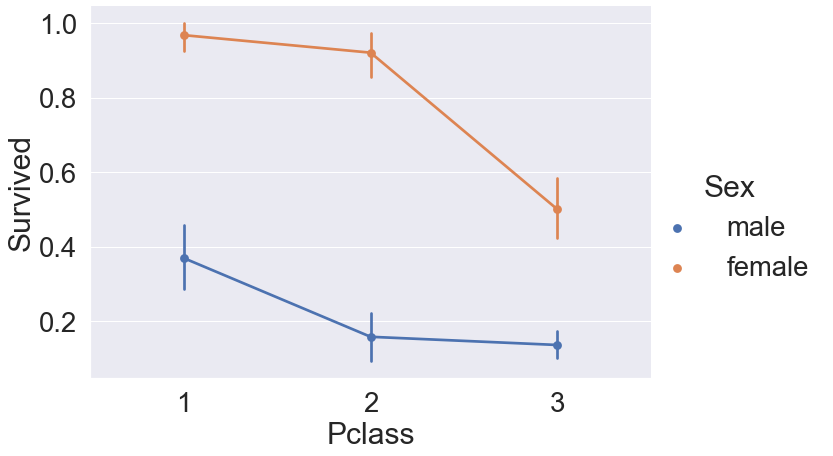

In [31]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6,
              aspect = 1.5)

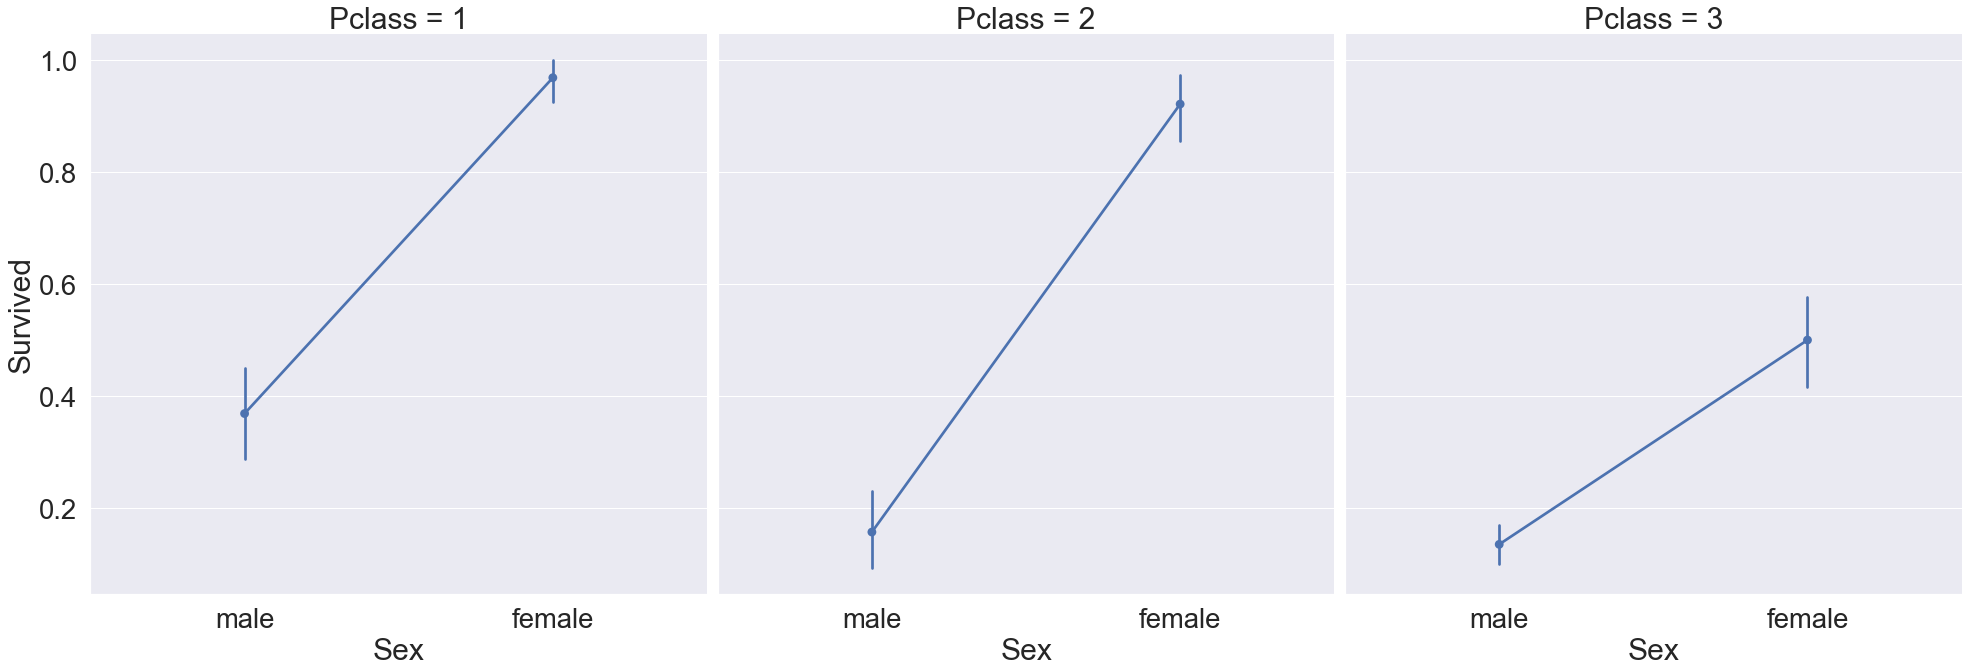

In [35]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train,
               satureation = .5, size = 9, aspect = 1)

In [37]:
print('old: ', df_train.Age.max())
print('Young: ', df_train.Age.min())
print('mean: ', df_train.Age.mean())

old:  80.0
Young:  0.42
mean:  29.69911764705882


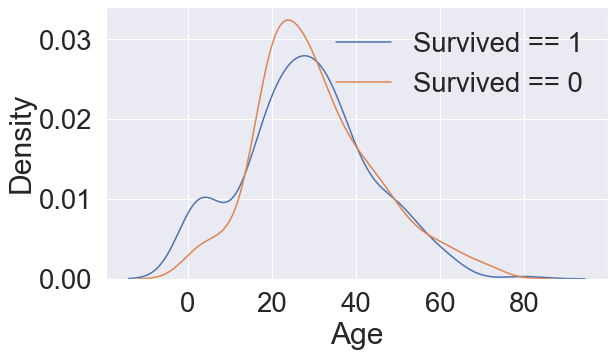

In [38]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

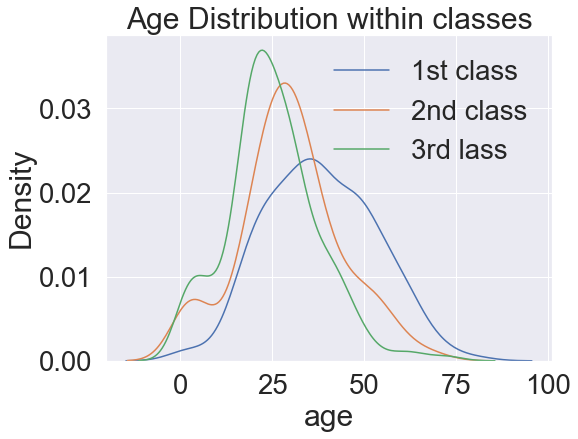

In [40]:
f, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.kdeplot(df_train[df_train['Pclass'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Pclass'] == 2]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Pclass'] == 3]['Age'], ax = ax)
ax.set_title('Age Distribution within classes')
ax.set_xlabel('age')
ax.legend(['1st class', '2nd class', '3rd lass'])

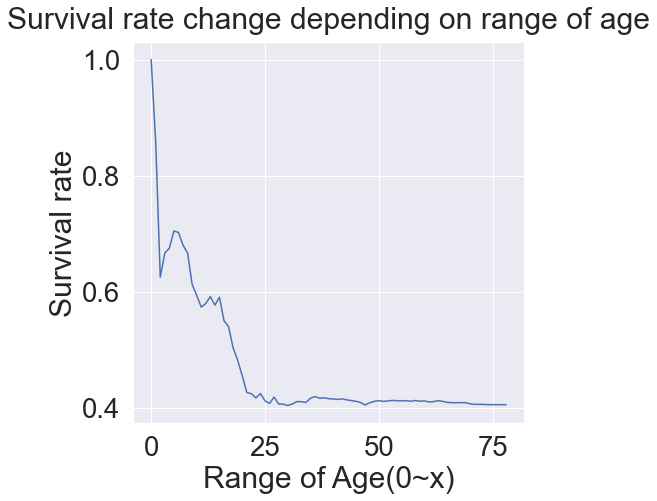

In [41]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() /
                                    len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

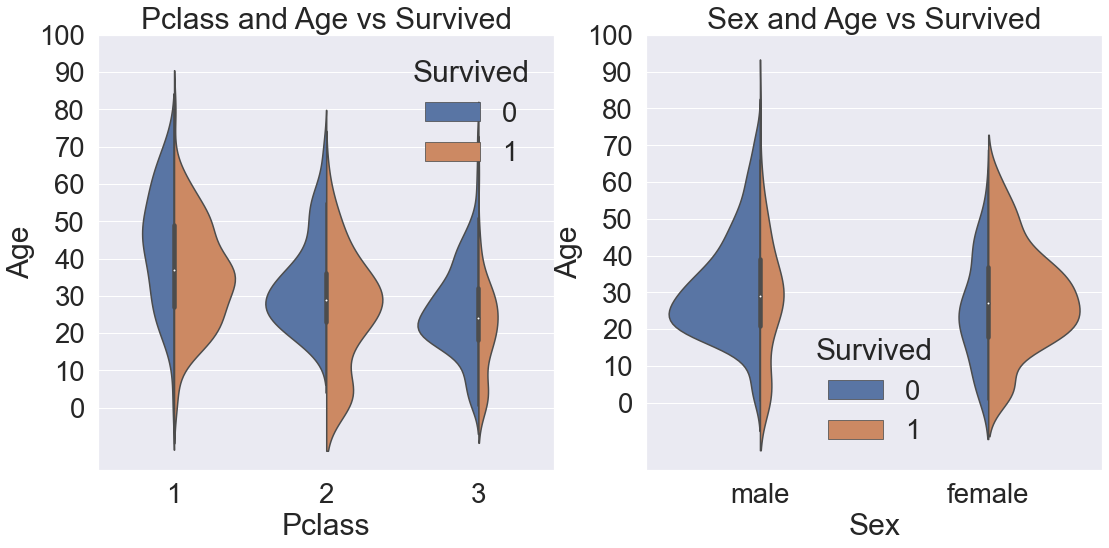

In [42]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count',
               split = True, ax= ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, scale = 'count',
               split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

<AxesSubplot:xlabel='Embarked'>

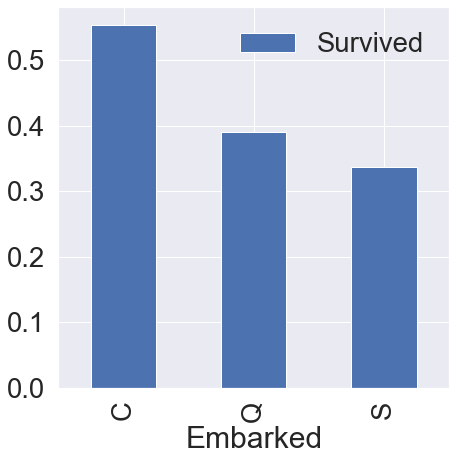

In [43]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(
         by = 'Survived', ascending = False).plot.bar(ax = ax)

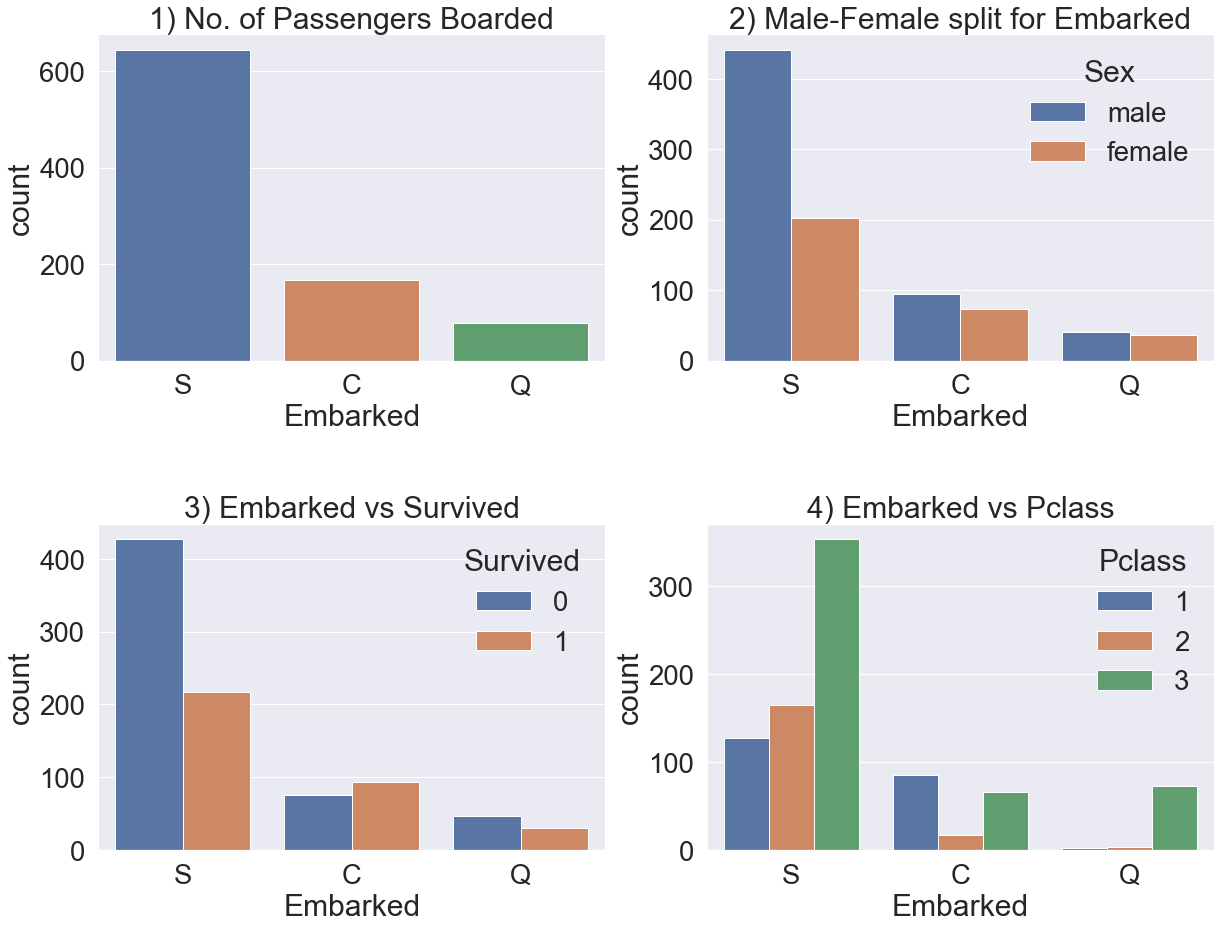

In [46]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
ax[0, 0].set_title('1) No. of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title('2) Male-Female split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
ax[1, 0].set_title('3) Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[1, 1].set_title('4) Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

In [47]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] =  df_test['SibSp'] + df_test['Parch'] + 1

In [48]:
print('Maxium family: ', df_train.FamilySize.max())
print('Minimum family: ', df_train.FamilySize.min())

Maxium family:  11
Minimum family:  1


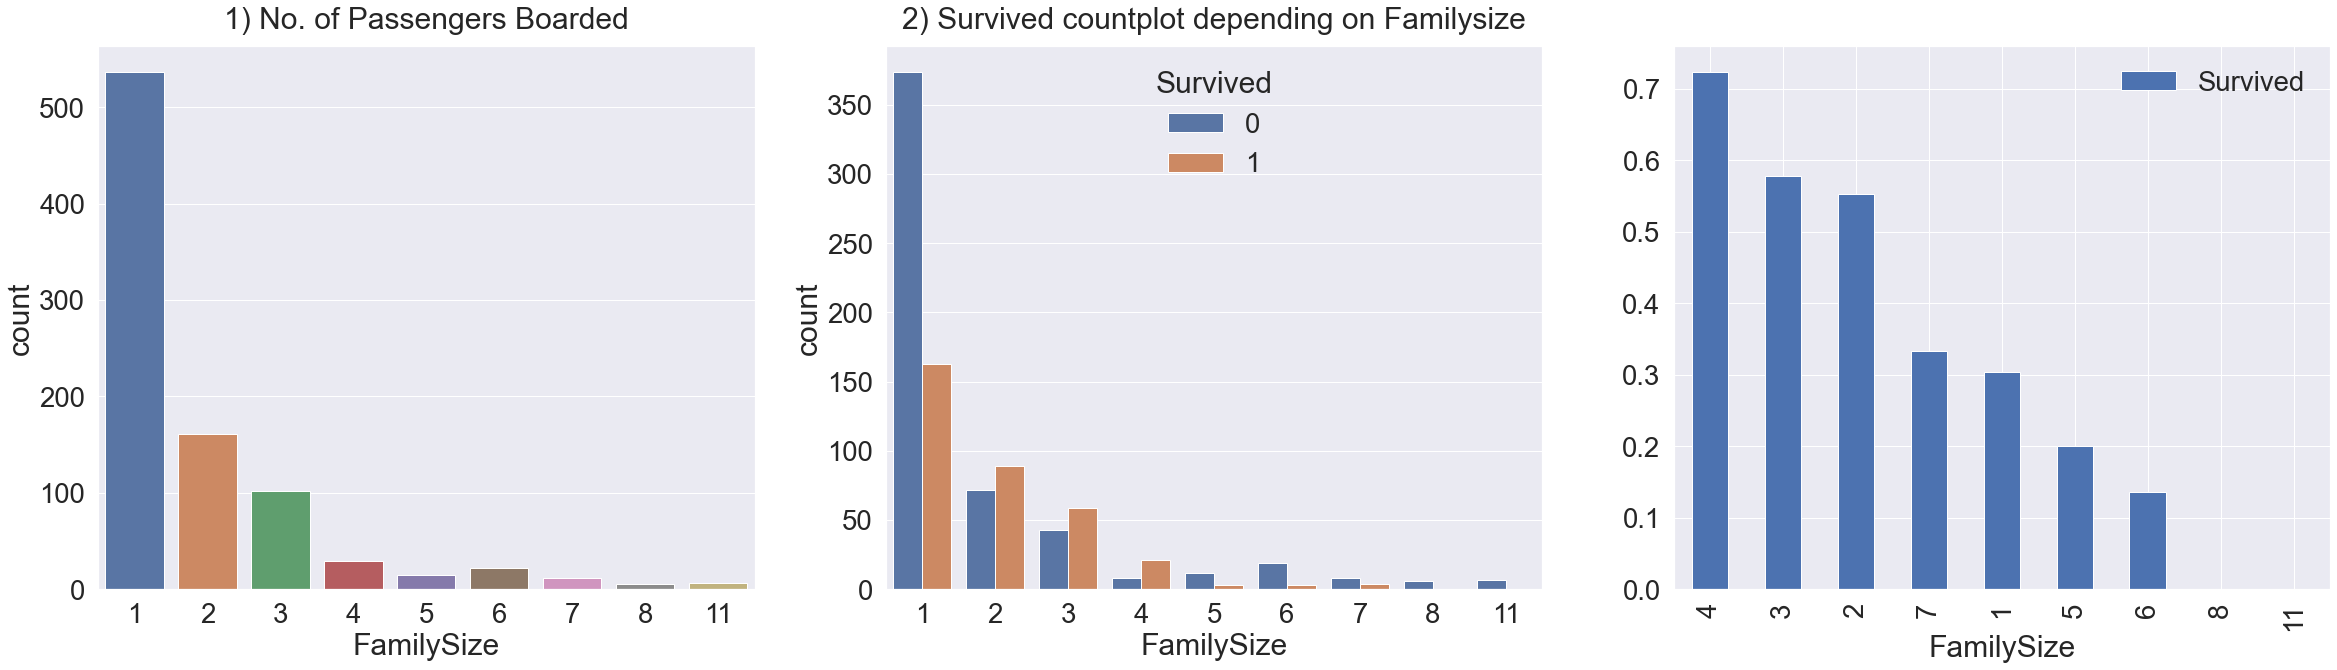

In [52]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot('FamilySize', data =df_train, ax = ax[0])
ax[0].set_title('1) No. of Passengers Boarded', y = 1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('2) Survived countplot depending on Familysize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', 
                                                                                                ascending = False).plot.bar(ax = ax[2])
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

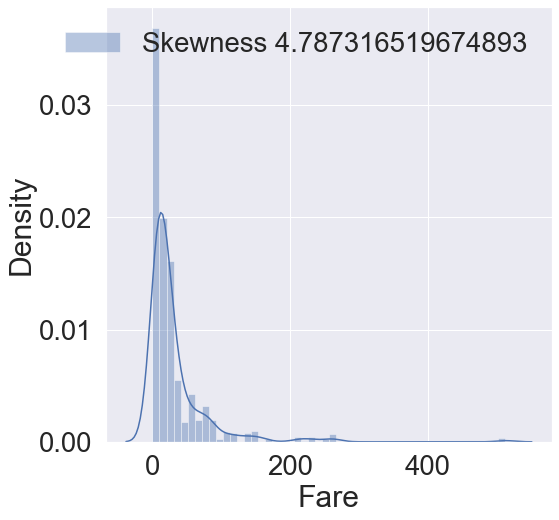

In [55]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], label = f"Skewness {df_train['Fare'].skew()}", ax = ax)
g = g.legend(loc = 'best')

In [56]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare']  = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

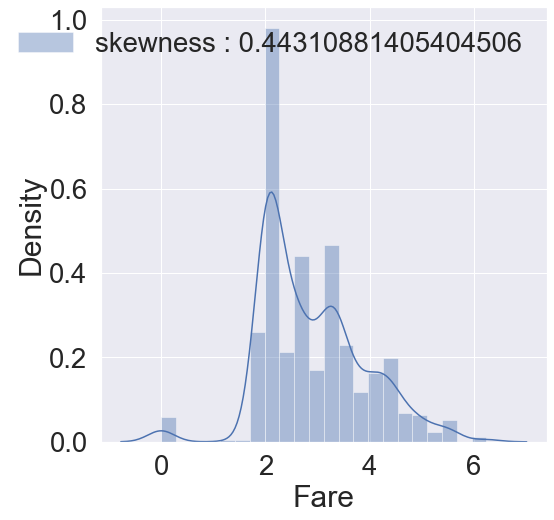

In [57]:
f, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], label = f"skewness : {df_train['Fare'].skew()}", ax = ax)
g = g.legend(loc = 'best')

In [58]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [59]:
df_train['Ticket'].value_counts()

1601          7
347082        7
CA. 2343      7
347088        6
3101295       6
             ..
C.A. 17248    1
370377        1
C.A. 33111    1
349209        1
349910        1
Name: Ticket, Length: 681, dtype: int64

In [60]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [62]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [63]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [64]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [65]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [66]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has  2 Null values


In [67]:
df_train.Embarked.fillna('S', inplace = True)

In [68]:
df_train['Age_cat'] = 0
df_train.loc[df_train.Age < 10, 'Age_cat'] = 0
df_train.loc[(df_train.Age >= 10) & (df_train.Age < 20), 'Age_cat'] = 1
df_train.loc[(df_train.Age >= 20) & (df_train.Age < 30), 'Age_cat'] = 2
df_train.loc[(df_train.Age >= 30) & (df_train.Age < 40), 'Age_cat'] = 3
df_train.loc[(df_train.Age >= 40) & (df_train.Age < 50), 'Age_cat'] = 4
df_train.loc[(df_train.Age >= 50) & (df_train.Age < 60), 'Age_cat'] = 5
df_train.loc[(df_train.Age >= 60) & (df_train.Age < 70), 'Age_cat'] = 6
df_train.loc[df_train.Age >= 70, 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [70]:
df_train.drop(['Age'], axis = 1, inplace = True)
df_test.drop(['Age'], axis = 1, inplace = True)

In [71]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [74]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [76]:
df_train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [78]:
df_train.Embarked.isnull().any()

False

In [79]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

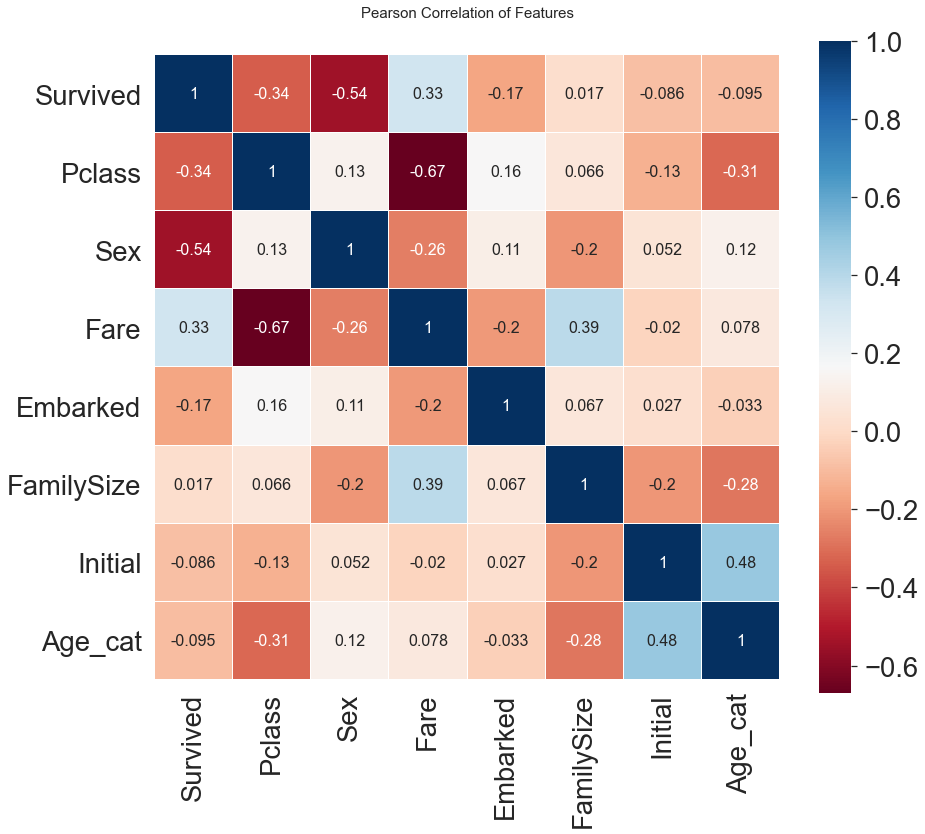

In [80]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize',
                         'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('Pearson Correlation of Features', y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True,
            annot_kws = {'size': 16})
del heatmap_data

In [81]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [83]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

In [86]:
# df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1,
#              inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1,
             inplace = True)

In [87]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [88]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,0.683603,1,3,0,0,1,0,0,0,1,0
1,3,0,1.450832,2,4,0,0,0,1,0,0,0,1
2,2,1,0.727559,1,6,0,0,1,0,0,0,1,0
3,3,1,1.379314,1,2,0,0,1,0,0,0,0,1
4,3,0,0.735091,3,2,0,0,0,1,0,0,0,1


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [90]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train.Survived.values
X_test = df_test.values

In [92]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018)

In [93]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [94]:
print('Accuracy: ', 100 * metrics.accuracy_score(prediction, y_vld))

Accuracy:  81.71641791044776


In [95]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

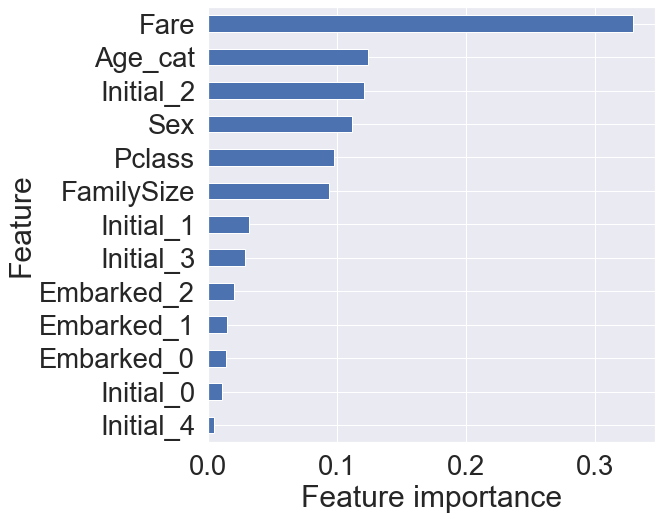

In [96]:
plt.figure(figsize = (8, 8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()